In [72]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
# please edit it to suit your root
root_path = "/home/hoang_mata/Desktop/computer-vision-basics/image_processing/"
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]


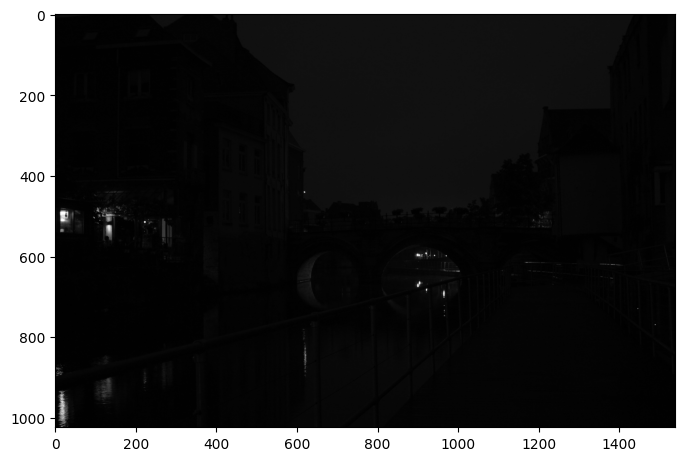

In [21]:
img = cv2.imread("low-exposure.jpg", 0)
plt.imshow(img, cmap = 'gray')

In [3]:
hist = cv2.calcHist(
    [img],
    channels=[0],
    mask=None,
    histSize=[256],
    ranges=[0,256]    
)

In [22]:
hist.shape

(256, 1)

In [23]:
sum(hist)

array([1574912.], dtype=float32)

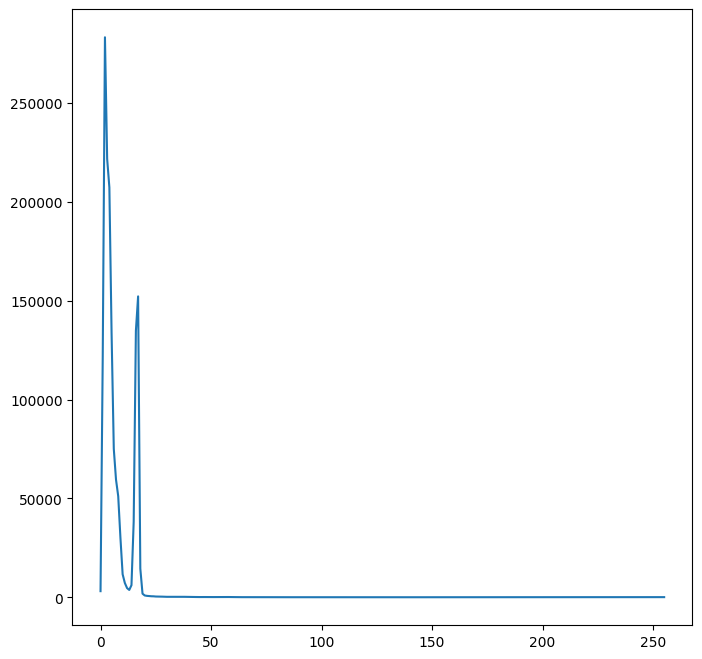

In [24]:
plt.plot(hist)

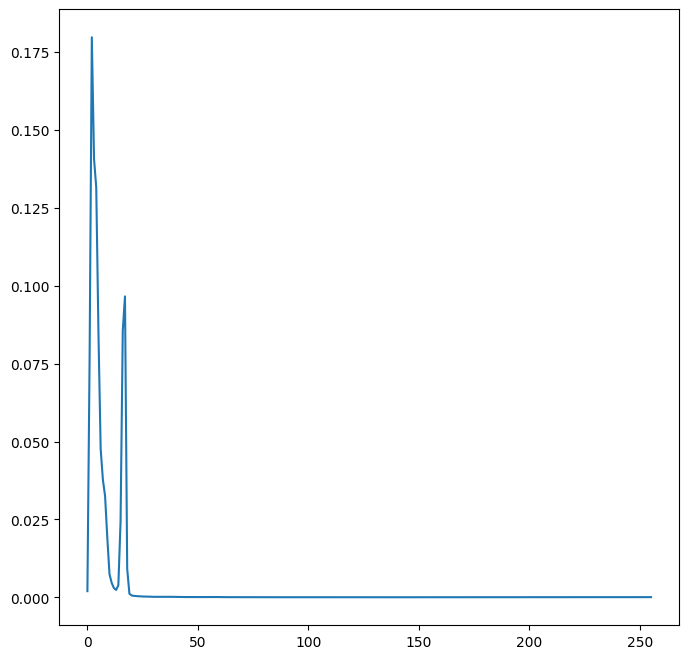

In [25]:
#normalized histogram
h, w = img.shape[:2]
normalized_hist = hist/(h*w)
plt.plot(normalized_hist)

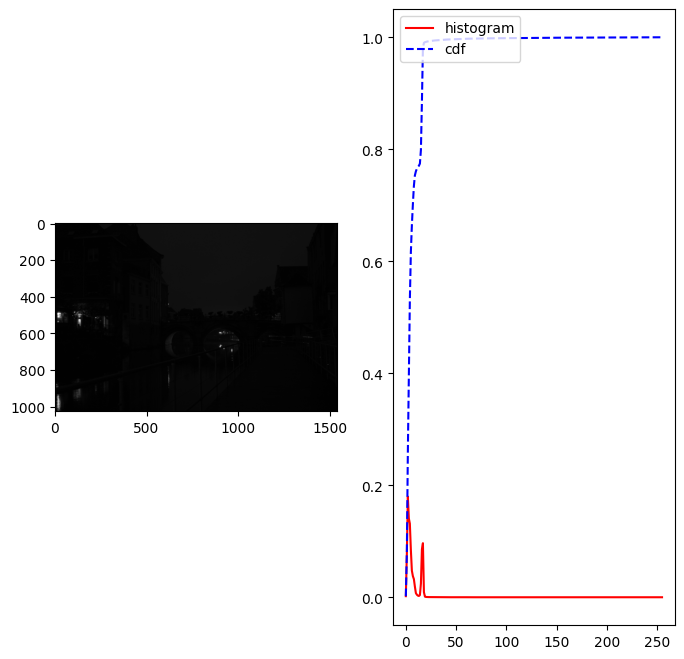

In [34]:

h, w = img.shape[:2]
normalized_hist = hist/(h*w)
cdf = normalized_hist.cumsum()
plt.subplot(1,2,1)    
plt.imshow(img, cmap = 'gray')
plt.subplot(1,2,2)
plt.plot(normalized_hist, 'r')
plt.plot(cdf, 'b--')  
plt.legend(('histogram', 'cdf'), loc = 'upper left')
plt.show()

In [33]:
def plot_img_and_hist(img):
    hist = cv2.calcHist(
        [img],
        channels=[0],
        mask=None,
        histSize=[256],
        ranges=[0, 256]
    )
    h, w = img.shape[:2]
    normalized_hist = hist/(h*w)
    cdf = normalized_hist.cumsum()
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.plot(normalized_hist, 'r')
    plt.plot(cdf, 'b--')
    plt.legend(('histogram', 'cdf'), loc='upper left')


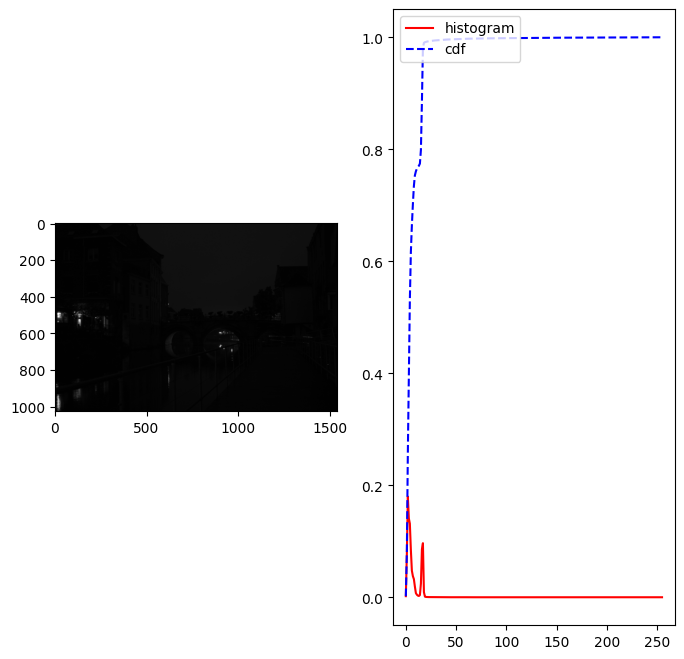

In [39]:
img_low = cv2.imread(root_path + "low-exposure.jpg", 0)
plot_img_and_hist(img_low)

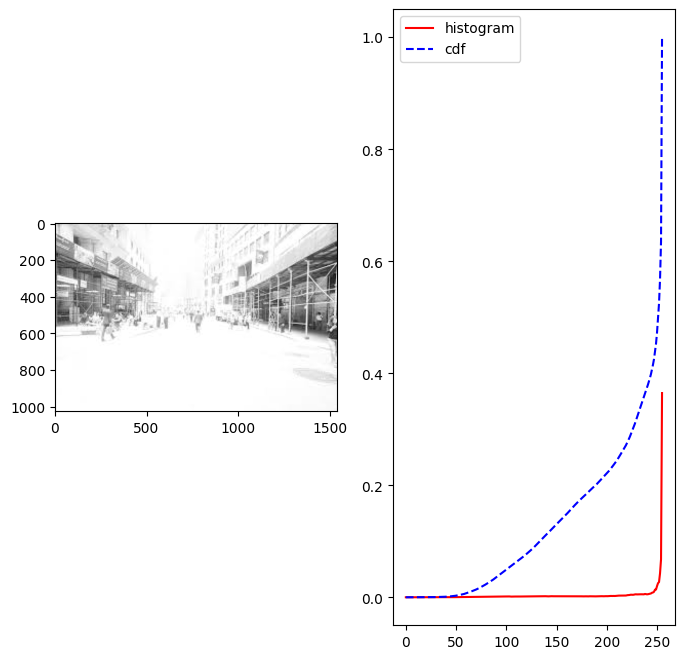

In [40]:
img_hight = cv2.imread(root_path + "high-exposure.jpg", 0)
plot_img_and_hist(img_hight)

In [41]:
def adjust_image_gamma_lookuptable(image, gamma = 1.0):
  table = np.array([((i/255.0) ** gamma) * 255 
      for i in np.arange(0,256)]).astype("uint8")
  return cv2.LUT(image, table)

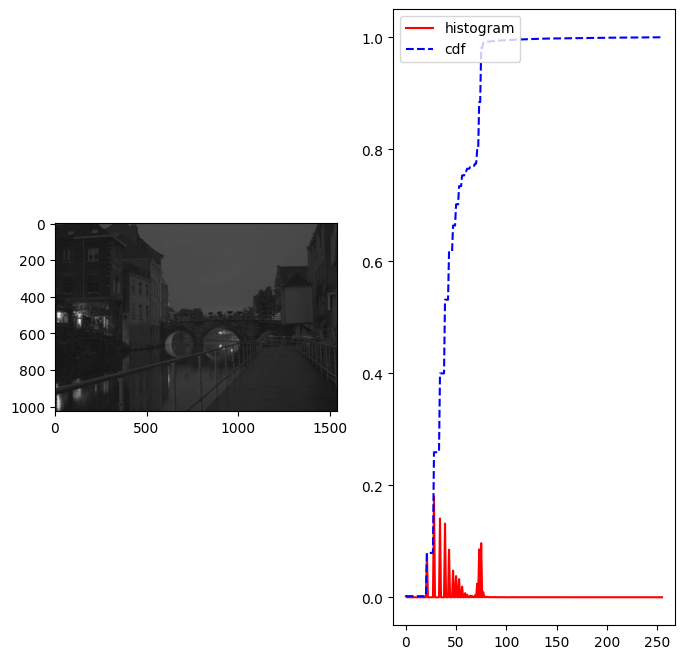

In [42]:
img_adjusted = adjust_image_gamma_lookuptable(img, gamma=0.45)
plot_img_and_hist(img_adjusted)

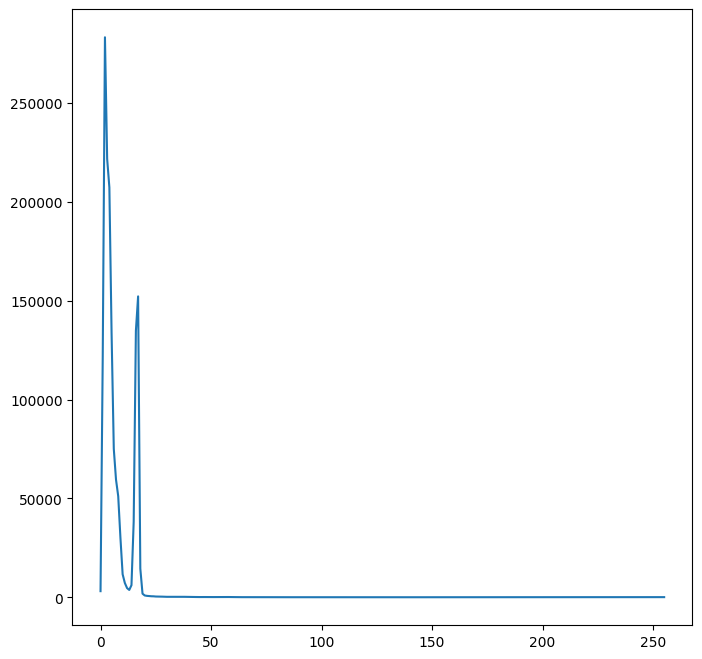

In [10]:
hist2 = np.histogram(img.ravel(), bins=256, range=[0, 256])
plt.plot(hist2[0])
plt.show()

## histogram equalization 

In [11]:
def hist_equalize(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    h, w = img.shape[:2]
    hist = hist / (h*w)
    cdf = np.cumsum(hist)
    s_k = (255 * cdf - 0.5).astype("uint8")
    return s_k

In [43]:
hist_equalize(img)

array([  0,  19,  65, 101, 135, 156, 168, 178, 186, 191, 193, 194, 195,
       195, 196, 203, 224, 249, 251, 252, 252, 252, 252, 252, 252, 252,
       252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 25

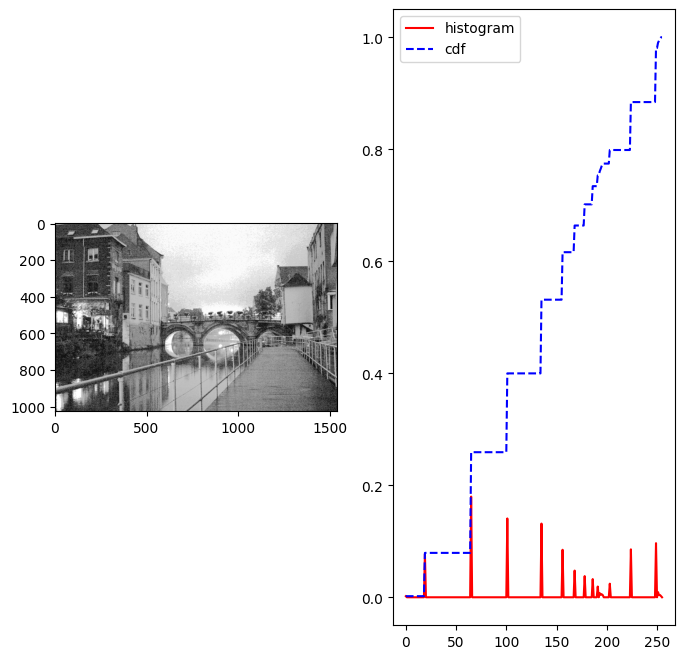

In [44]:
s_k = hist_equalize(img)
equalized_img = cv2.LUT(img, s_k)
plot_img_and_hist(equalized_img)

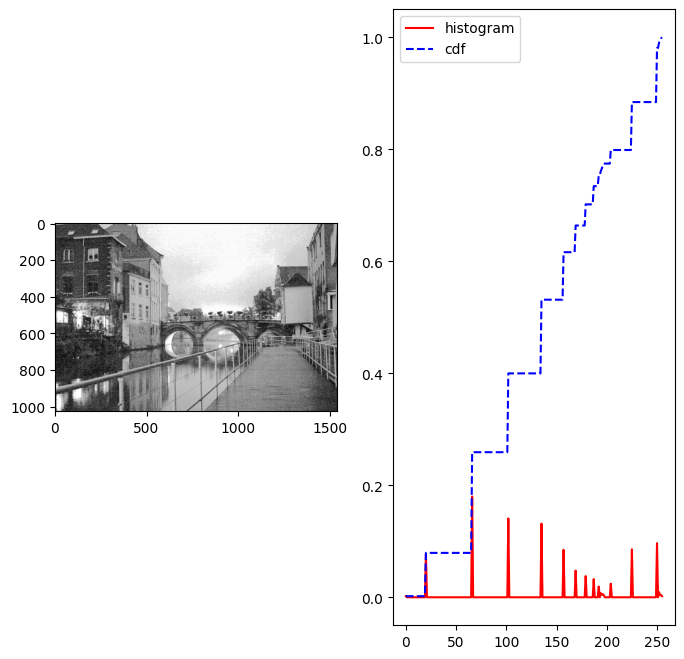

In [45]:
img_equalized = cv2.equalizeHist(img)
plot_img_and_hist(img_equalized)

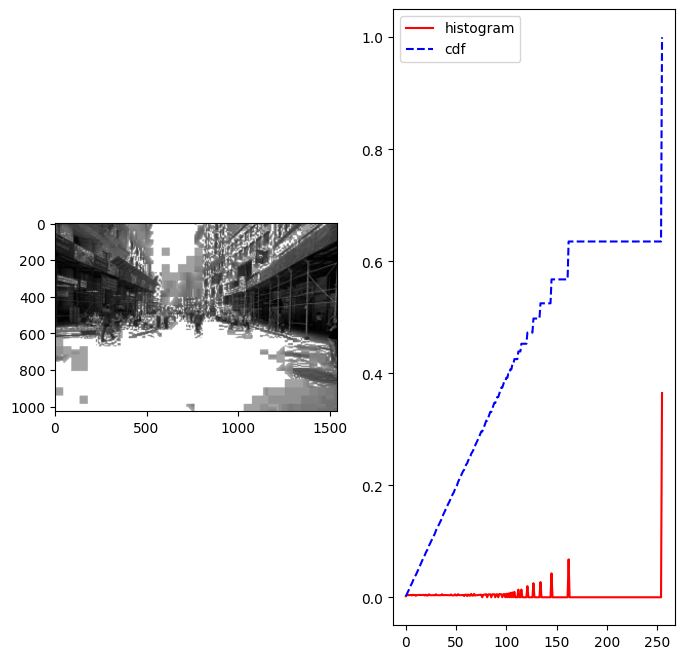

In [46]:
high_exposure_img = cv2.imread(root_path + 'high-exposure.jpg', 0)
he_equalized = cv2.equalizeHist(high_exposure_img)
plot_img_and_hist(he_equalized)

## histogram matching

In [50]:
def histogram_matching(src, temp):
    oldshape = src.shape
    src = src.ravel()
    temp = temp.ravel()
    
    s_val, bin_idx, s_counts = np.unique(src,
                                         return_inverse=True,
                                         return_counts=True,
                                         )
    t_val, t_counts = np.unique(temp, return_counts=True)
    
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles = s_quantiles/s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles = t_quantiles/t_quantiles[-1]
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_val)
    result = interp_t_values[bin_idx].reshape(oldshape)
    result = result.astype(np.uint8)
    return result


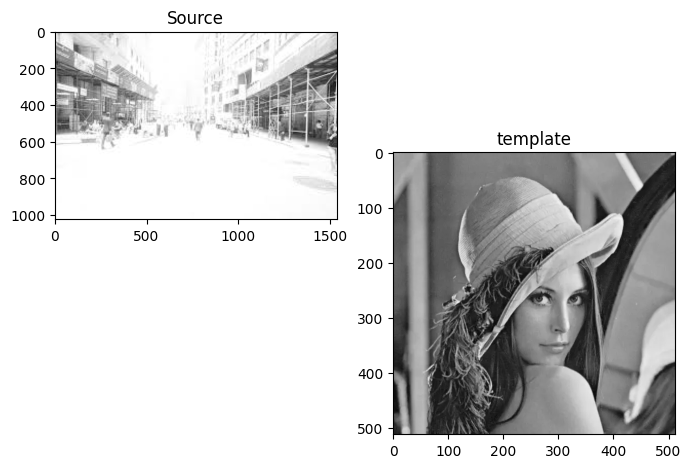

In [57]:
src = cv2.imread(root_path + "high-exposure.jpg", 0)
temp = cv2.imread(root_path + 'lena.jpg', 0)
plt.subplot(2, 2, 1)
plt.imshow(src, cmap="gray")
plt.title("Source")
plt.subplot(1,2,2)
plt.imshow(temp, cmap="gray")
plt.title("template")
plt.show()

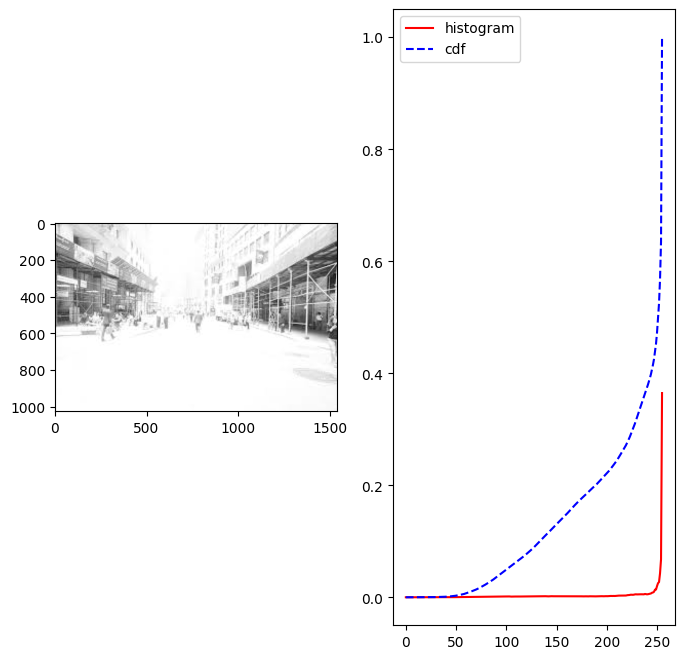

In [58]:
plot_img_and_hist(src)

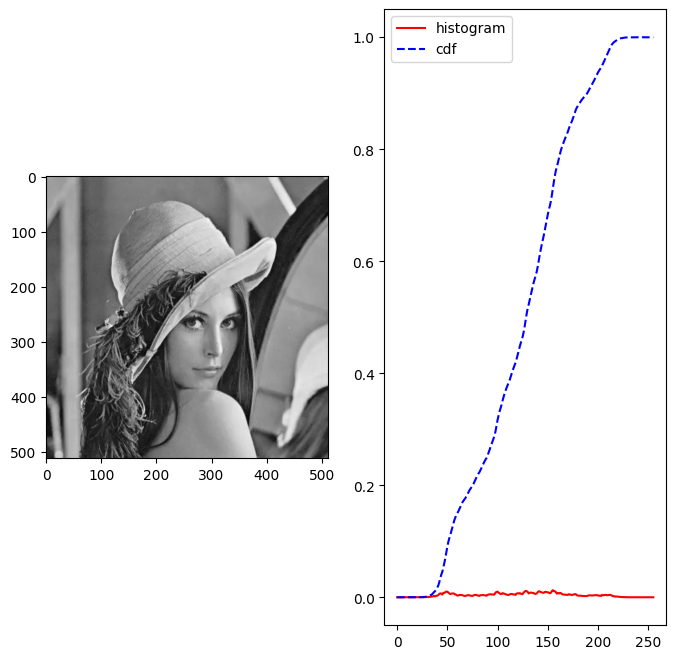

In [59]:
plot_img_and_hist(temp)

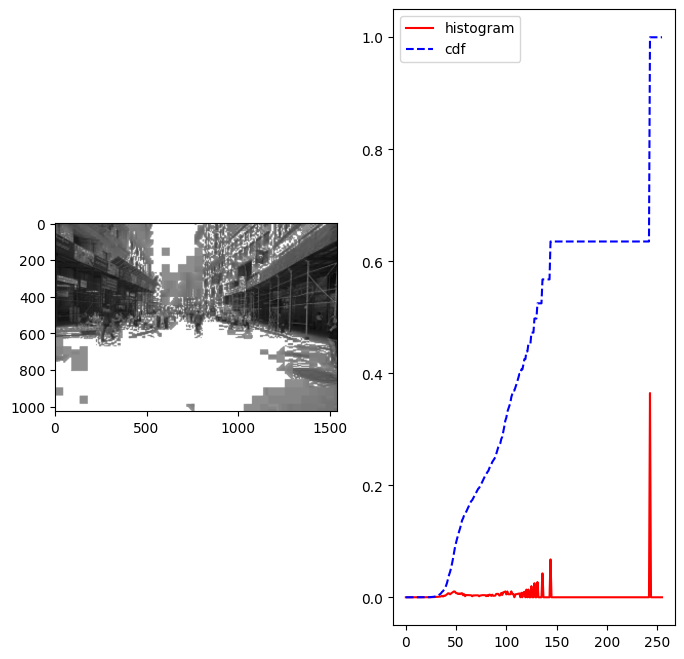

In [61]:
he_matched = histogram_matching(src, temp)
plot_img_and_hist(he_matched)

In [62]:
# https://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html

## image retrieval using histogram

In [69]:
def calc_hist(img, bins_per_channel=20):
    h, w = img.shape[:2]
    hist = [
        np.histogram(img[:,:,i], bins=20, range=(0, 256))[0]
        for i in range(3)
    ]
    hist = np.array(hist).ravel()
    hist = hist/(h*w)
    return hist

In [70]:
img_names = glob.glob(root_path + "/flowers/*.jpg")
img_names = [
    cv2.imread(img_name)
    for img_name in img_names
]
xs = [
    calc_hist(img)
    for img in img_names
]

In [73]:
input_img = img_names[0]
input_hist = xs[0]
all_dicts = [
    distance.euclidean(input_hist, xi)
    for xi in xs
]

In [76]:
sorted_idxs = np.argsort(all_dicts)
sorted_idxs

array([ 0,  1,  2, 11,  7,  3, 10,  9,  6,  5,  8,  4])

In [79]:
ranked_imgs = [img_names[i] for i in sorted_idxs]
# ranked_imgs

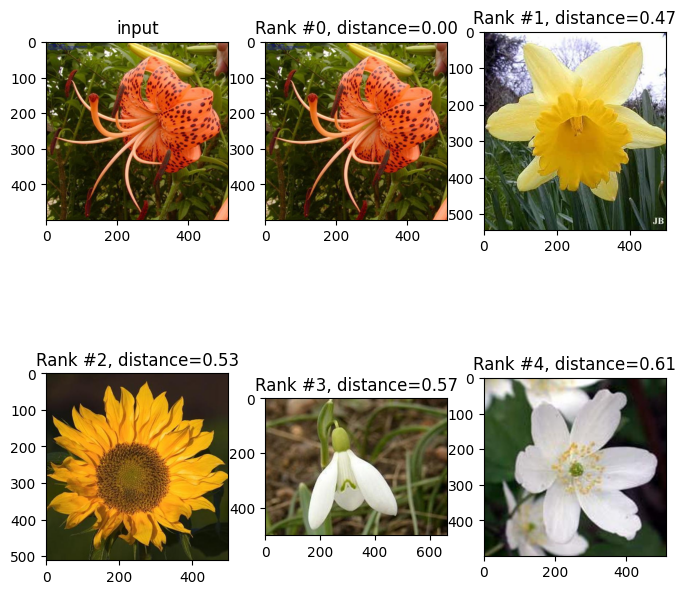

In [86]:
plt.subplot(2, 3, 1)
plt.imshow(input_img[:,:,::-1])
plt.title("input")
for i in range(0, 5):
    plt.subplot(2, 3, i+2)
    idx = sorted_idxs[i]
    found = ranked_imgs[i]
    dist = all_dicts[idx]
    plt.imshow(found[:,:,::-1])
    plt.title("Rank #{}, distance={:.2f}".format(i, dist))
plt.show()